In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
adv = pd.read_csv('Advertising.csv')

In [4]:
# Features and target variable
X = adv[['TV', 'Radio', 'Newspaper']]
y = adv['Sales']

In [22]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Shape of X_scaled:", X_scaled.shape)
X_scaled

Shape of X_scaled: (200, 3)


array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [19]:
# Adding polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)  #to capture non-linear relationships in the data.
print("Shape of X_poly:", X_poly.shape)
X_poly

Shape of X_poly: (200, 9)


array([[ 0.96985227,  0.98152247,  1.77894547, ...,  0.96338636,
         1.74607495,  3.16464698],
       [-1.19737623,  1.08280781,  0.66957876, ...,  1.17247276,
         0.72502511,  0.44833572],
       [-1.51615499,  1.52846331,  1.78354865, ...,  2.33620009,
         2.72608867,  3.18104578],
       ...,
       [ 0.34981006, -0.942899  , -1.11185242, ...,  0.88905852,
         1.04836453,  1.23621581],
       [ 1.59456522,  1.26512143,  1.64085003, ...,  1.60053222,
         2.07587452,  2.69238881],
       [ 0.99320602, -0.99016549, -1.00597925, ...,  0.98042769,
         0.99608594,  1.01199426]])

In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [8]:
# Ridge Regression for better regularization
ridge = Ridge(alpha=1.0)  # L2 Regularization,reduce overfitting.
ridge.fit(X_train, y_train)

Ridge()

In [9]:
# Predictions and evaluation
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:

print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 0.4126
R2 Score: 0.9869


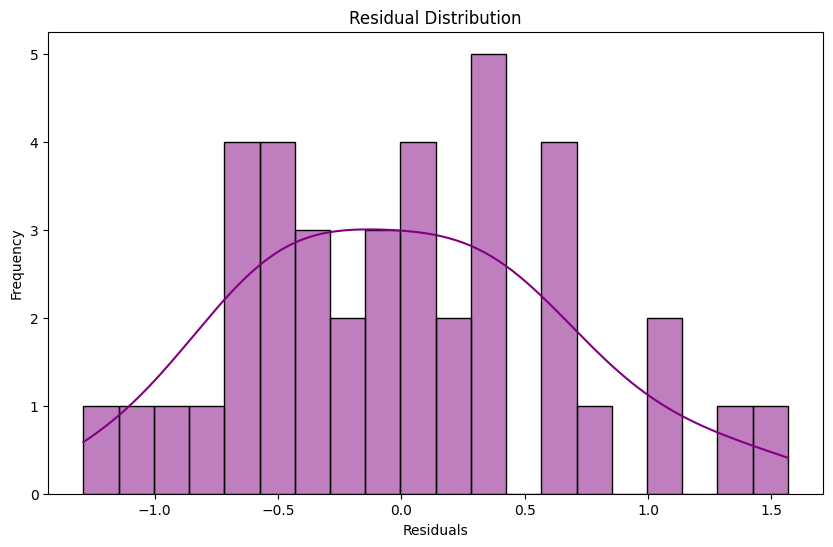

In [11]:
# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color="purple")
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [12]:

# Make a prediction for new data
new_data = np.array([38.2, 3.7, 13.8]).reshape(1, -1)
new_data_scaled = scaler.transform(new_data)
new_data_poly = poly.transform(new_data_scaled)
prediction = ridge.predict(new_data_poly).item()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
print(f"Prediction = {prediction:.2f}")
print("Actual = 7.6")

Prediction = 7.19
Actual = 7.6
